In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbs
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import dataset
df_cc = pd.read_csv("data.csv")

In [3]:
df_cc.head()

,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,2,220000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             30000 non-null  int64  
 1   Credit_Amount           30000 non-null  float64
 2   Gender                  30000 non-null  int64  
 3   Academic_Qualification  30000 non-null  int64  
 4   Marital                 30000 non-null  int64  
 5   Age_Years               30000 non-null  int64  
 6   Repayment_Status_Jan    30000 non-null  int64  
 7   Repayment_Status_Feb    30000 non-null  int64  
 8   Repayment_Status_March  30000 non-null  int64  
 9   Repayment_Status_April  30000 non-null  int64  
 10  Repayment_Status_May    30000 non-null  int64  
 11  Repayment_Status_June   30000 non-null  int64  
 12  Jan_Bill_Amount         30000 non-null  float64
 13  Feb_Bill_Amount         30000 non-null  float64
 14  March_Bill_Amount       30000 non-null

In [5]:
df_cc.drop("Customer ID", axis=1, inplace=True)

In [6]:
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Credit_Amount           30000 non-null  float64
 1   Gender                  30000 non-null  int64  
 2   Academic_Qualification  30000 non-null  int64  
 3   Marital                 30000 non-null  int64  
 4   Age_Years               30000 non-null  int64  
 5   Repayment_Status_Jan    30000 non-null  int64  
 6   Repayment_Status_Feb    30000 non-null  int64  
 7   Repayment_Status_March  30000 non-null  int64  
 8   Repayment_Status_April  30000 non-null  int64  
 9   Repayment_Status_May    30000 non-null  int64  
 10  Repayment_Status_June   30000 non-null  int64  
 11  Jan_Bill_Amount         30000 non-null  float64
 12  Feb_Bill_Amount         30000 non-null  float64
 13  March_Bill_Amount       30000 non-null  float64
 14  April_Bill_Amount       30000 non-null

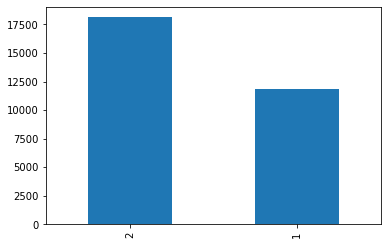

In [7]:
df_cc["Gender"].value_counts().plot(kind="bar");

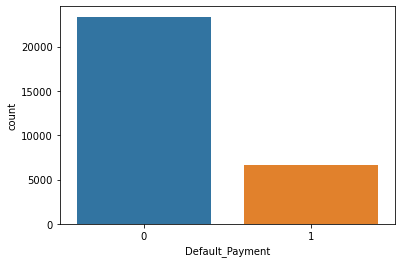

In [8]:
sbs.countplot(x="Default_Payment",data=df_cc);

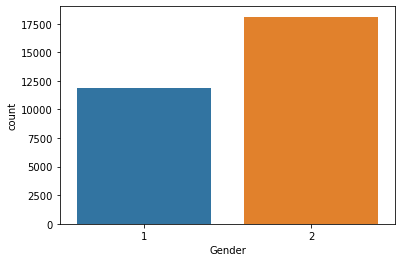

In [9]:
sbs.countplot(x="Gender",data=df_cc);

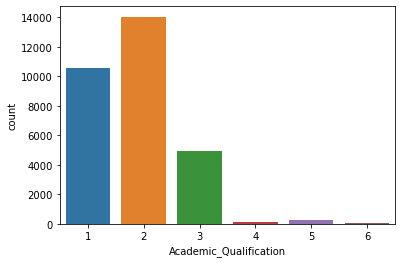

In [10]:
sbs.countplot(x="Academic_Qualification",data=df_cc);

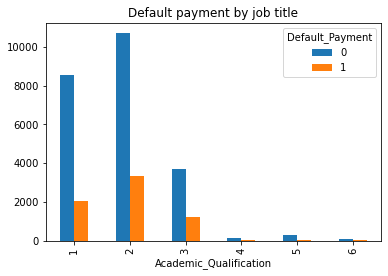

In [11]:
pd.crosstab(df_cc["Academic_Qualification"],df_cc["Default_Payment"]).plot(kind="bar")
plt.title("Default payment by job title");

In [12]:
table = pd.crosstab(df_cc["Academic_Qualification"],df_cc["Marital"])

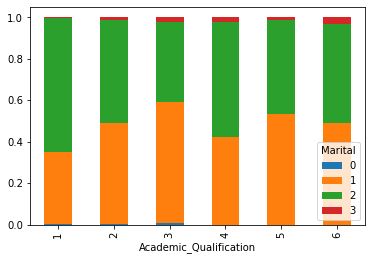

In [13]:
table.div(table.sum(1).astype("float"),axis=0).plot(kind="bar",stacked=True);

In [14]:
df_corr = df_cc.corr()

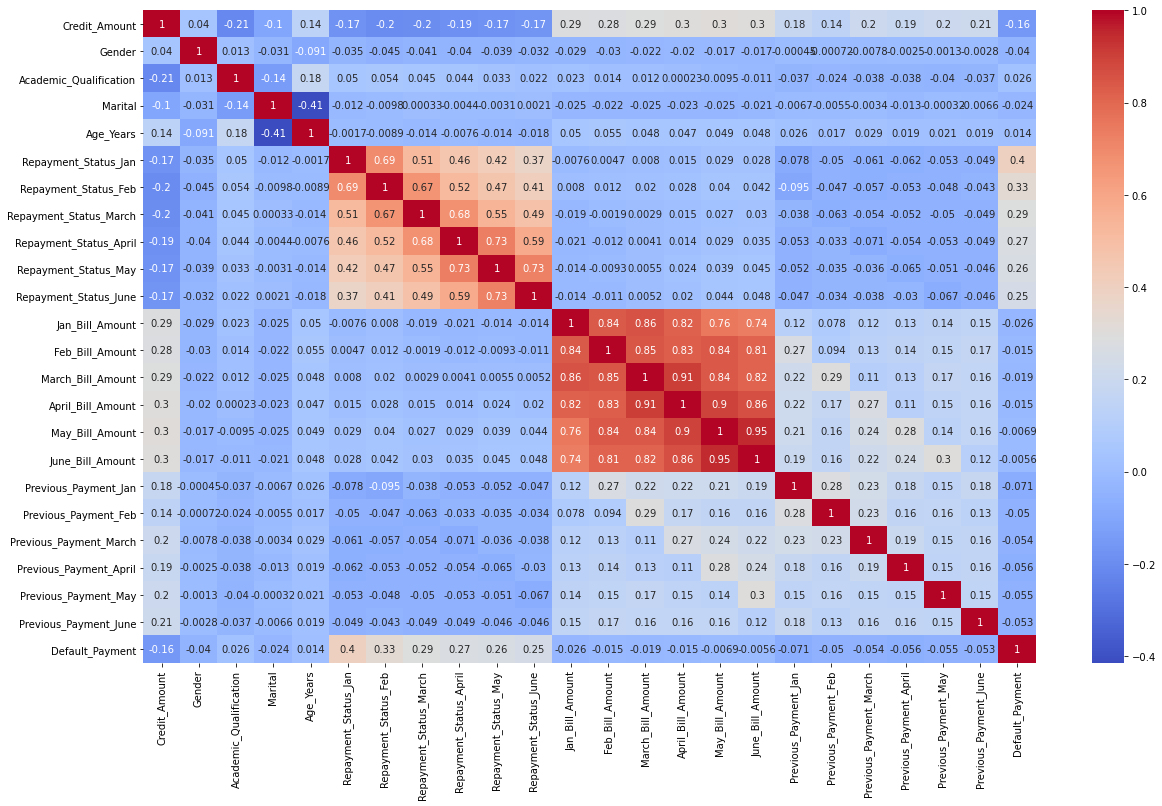

In [15]:
plt.figure(figsize=(20,12))
sbs.heatmap(df_corr,cmap="coolwarm",annot=True);
plt.savefig("corr_matrix")

In [16]:
x = df_cc.drop("Default_Payment",axis=1)
y = df_cc["Default_Payment"]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

In [19]:
from sklearn.linear_model import SGDClassifier
sgc = SGDClassifier(loss = "log", max_iter = 1000, early_stopping=True)

In [20]:
sgc.fit(x_train,y_train)

SGDClassifier(early_stopping=True, loss='log')

In [21]:
pred_test = sgc.predict(x_test)

In [22]:
print("Accuracy on train data: {}".format(round(sgc.score(x_train,y_train),2)))

Accuracy on train data: 0.53


In [23]:
print("Accuracy on test data: {}".format(round(sgc.score(x_test,y_test),2)))

Accuracy on test data: 0.52


In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [25]:
kfold = KFold(n_splits=10,random_state=0,shuffle=True)
model = SGDClassifier(loss = "log", tol=0.01, eta0=1.0, learning_rate="adaptive", max_iter=1000, early_stopping=True)
results = cross_val_score(model,x,y,cv=10,scoring="accuracy")
print("Avg. Result {}".format(round(results.mean(),3)))
print(results)

Avg. Result 0.617
[0.61633333 0.57233333 0.557      0.606      0.62966667 0.61666667
 0.65166667 0.65833333 0.656      0.60733333]


In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
confusionmatrix = confusion_matrix(y_test,pred_test)

In [28]:
confusionmatrix

array([[3462, 3598],
       [ 754, 1186]], dtype=int64)

In [29]:
print("True Positive is {0}. Which means {0} are predicted correctly as 1".format(confusionmatrix[0][0]))
print("False Positive is {0}. Which means {0} are wrongly predicted as 1".format(confusionmatrix[1][0]))
print("True Negetive is {0}. Which means {0} are predicted correctly as 0".format(confusionmatrix[1][1]))
print("False Negetive is {0}. Which means {0} are 0 but predicted as 0".format(confusionmatrix[0][1]))

True Positive is 3462. Which means 3462 are predicted correctly as 1
False Positive is 754. Which means 754 are wrongly predicted as 1
True Negetive is 1186. Which means 1186 are predicted correctly as 0
False Negetive is 3598. Which means 3598 are 0 but predicted as 0


In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.82      0.49      0.61      7060
           1       0.25      0.61      0.35      1940

    accuracy                           0.52      9000
   macro avg       0.53      0.55      0.48      9000
weighted avg       0.70      0.52      0.56      9000



In [32]:
# Grid Search

In [33]:
from sklearn.model_selection import GridSearchCV 

In [34]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="log")
param_grid = {
              "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
             "tol":[0.0001, 0.001, 0.01, 0.1, 1],
             "eta0":[0.2,0.5,1.0,1.5,2.0,2.5,3.0],
             "learning_rate":["adaptive"]
}

In [35]:
%%time
grid_search = GridSearchCV(sgd,param_grid=param_grid)
grid_search.fit(x_train, y_train);

Wall time: 12min 14s


GridSearchCV(estimator=SGDClassifier(loss='log'),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'eta0': [0.2, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0],
                         'learning_rate': ['adaptive'],
                         'tol': [0.0001, 0.001, 0.01, 0.1, 1]})

In [36]:
grid_search.best_estimator_.max_iter

1000

In [37]:
# creating model with best paramaters

In [38]:
sgd_bpm = SGDClassifier(alpha=0.1, eta0=3.0, learning_rate="adaptive", tol=1,loss="log")

In [39]:
sgd_bpm.fit(x_train, y_train);

In [40]:
sgd_bpm.score(x_train, y_train)

0.7743333333333333

In [41]:
pred_test_bpm = sgd_bpm.predict(x_test)

In [42]:
sgd_bpm.score(x_test, y_test)

0.7824444444444445

In [43]:
# Confusion matrix

In [44]:
conf_matrix = confusion_matrix(y_test,pred_test_bpm)
conf_matrix

array([[7025,   35],
       [1923,   17]], dtype=int64)

In [45]:
print("True Positive is {0}. Which means {0} are predicted correctly as 1".format(conf_matrix[0][0]))
print("False Positive is {0}. Which means {0} are wrongly predicted as 1".format(conf_matrix[1][0]))
print("True Negetive is {0}. Which means {0} are predicted correctly as 0".format(conf_matrix[1][1]))
print("False Negetive is {0}. Which means {0} are 0 but predicted as 0".format(conf_matrix[0][1]))

True Positive is 7025. Which means 7025 are predicted correctly as 1
False Positive is 1923. Which means 1923 are wrongly predicted as 1
True Negetive is 17. Which means 17 are predicted correctly as 0
False Negetive is 35. Which means 35 are 0 but predicted as 0


In [46]:
# Classification Report

In [47]:
print(classification_report(y_test,pred_test_bpm))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      7060
           1       0.33      0.01      0.02      1940

    accuracy                           0.78      9000
   macro avg       0.56      0.50      0.45      9000
weighted avg       0.69      0.78      0.69      9000



In [48]:
# ROC Curve

In [49]:
from sklearn.metrics import roc_auc_score, roc_curve

In [50]:
#Calculate auc score

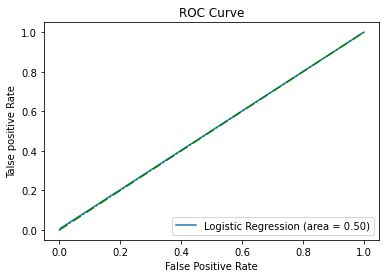

In [52]:
#AUC Score
auc_score = roc_auc_score(y_test,pred_test_bpm)

#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, sgd_bpm.predict_proba(x_test)[:,1])

plt.figure()

plt.plot(fpr, tpr, label = "Logistic Regression (area = %0.2f)" %auc_score)

#Diagonal line
plt.plot([0,1],[0,1],"g-.");

plt.xlabel('False Positive Rate')

plt.ylabel("Talse positive Rate")

plt.legend(loc="lower right")

plt.title("ROC Curve");